# **Training a model on Protective Gear**

In [ ]:
##Checking if we are using GPU or CPU

!nvidia-smi

Tue Jul 29 11:41:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## **Step 01 install the required packages**


In [ ]:
!pip install git+https://github.com/sunsmarterjie/yolov12.git

  Cloning https://github.com/sunsmarterjie/yolov12.git to /tmp/pip-req-build-y1q2hez_
  Running command git clone --filter=blob:none --quiet https://github.com/sunsmarterjie/yolov12.git /tmp/pip-req-build-y1q2hez_
  Resolved https://github.com/sunsmarterjie/yolov12.git to commit 8ac4c18b10d40665db7e0a72fe0ac176b2855d4e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install ultralytics

## **Step 02 Import the Required Libraries**

In [ ]:
import os
import ultralytics
ultralytics.checks()

Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:

HOME = os.getcwd()
print(HOME)


/content


## **Step 03 Download Dataset from Roboflow**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nQa6aqpKmYdjy8vuDgwn")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(2)
dataset = version.download("yolov12")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


## **Step 04 Fine-tune YOLOv12 model on a Custom Dataset**

In [ ]:
"""

# Use Python to construct the file path
yaml_path = f"{dataset.location}/data.yaml"

# Remove the last 4 lines from the file
!sed -i '$d' {yaml_path}
!sed -i '$d' {yaml_path}
!sed -i '$d' {yaml_path}
!sed -i '$d' {yaml_path}

# Append corrected lines
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {yaml_path}

"""


'\n\n# Use Python to construct the file path\nyaml_path = f"{dataset.location}/data.yaml"\n\n# Remove the last 4 lines from the file\n!sed -i \'$d\' {yaml_path}\n!sed -i \'$d\' {yaml_path}\n!sed -i \'$d\' {yaml_path}\n!sed -i \'$d\' {yaml_path}\n\n# Append corrected lines\n!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {yaml_path}\n\n'

In [ ]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [ ]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 7
names: ['Dust Mask', 'Eye Wear', 'Glove', 'Protective Boots', 'Protective Helmet', 'Safety Vest', 'Shield']

roboflow:
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
model = YOLO('yolov12m.yaml')

In [ ]:
results = model.train(data=f'{dataset.location}/data.yaml', epochs=50)

New https://pypi.org/project/ultralytics/8.3.170 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12m.yaml, data=/content/PPE_Detection-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False,

train: Scanning /content/PPE_Detection-2/train/labels.cache... 2271 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2271/2271 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/PPE_Detection-2/valid/labels.cache... 637 images, 0 backgrounds, 0 corrupt: 100%|██████████| 637/637 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 131 weight(decay=0.0), 138 weight(decay=0.0005), 137 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      12.8G      3.812      4.632      4.054         98        640: 100%|██████████| 142/142 [02:19<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:14<00:00,  1.37it/s]

                   all        637       3064    0.00667      0.123    0.00697    0.00238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      12.1G      3.039      3.606      3.221         77        640: 100%|██████████| 142/142 [02:18<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]

                   all        637       3064      0.505      0.148       0.13     0.0419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50        12G      2.565      2.864      2.671        144        640: 100%|██████████| 142/142 [02:16<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:14<00:00,  1.39it/s]

                   all        637       3064      0.653      0.311      0.302      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      12.3G      2.248      2.375      2.317        111        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:14<00:00,  1.42it/s]

                   all        637       3064       0.73      0.361      0.411      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.9G      2.046      2.084      2.119        116        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]

                   all        637       3064      0.721      0.439      0.487      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      12.1G      1.925      1.897      1.998         97        640: 100%|██████████| 142/142 [02:16<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.43it/s]

                   all        637       3064      0.756      0.488      0.543      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50        12G      1.845      1.781      1.912        111        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]

                   all        637       3064      0.769      0.497      0.558      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      12.4G      1.766      1.691      1.852         87        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]

                   all        637       3064      0.798      0.535      0.602      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      12.1G      1.685      1.575      1.764        127        640: 100%|██████████| 142/142 [02:15<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:14<00:00,  1.38it/s]

                   all        637       3064      0.821      0.564      0.625      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      12.3G      1.648       1.52      1.748         81        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.807      0.537      0.614      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      12.1G      1.587      1.424      1.683        133        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.838      0.578      0.659       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      12.3G      1.565      1.389      1.647         96        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.855      0.592      0.664      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      12.1G      1.535      1.356      1.621        103        640: 100%|██████████| 142/142 [02:14<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.847      0.605      0.673      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50        12G      1.509      1.311      1.588         75        640: 100%|██████████| 142/142 [02:14<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.855      0.596      0.667      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50        12G      1.491      1.305      1.592         79        640: 100%|██████████| 142/142 [02:14<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.839       0.64      0.702      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50        12G      1.463       1.25      1.562         90        640: 100%|██████████| 142/142 [02:14<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]

                   all        637       3064       0.87       0.63      0.696      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.9G      1.435      1.213      1.532        139        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.883      0.628      0.705      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50        12G       1.42      1.188       1.52        109        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.874      0.649      0.722      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      12.1G        1.4       1.16      1.506         83        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.47it/s]

                   all        637       3064      0.895      0.641      0.717      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50        12G      1.383      1.139      1.496         85        640: 100%|██████████| 142/142 [02:14<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]

                   all        637       3064      0.887      0.657      0.731      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50        12G      1.374      1.135      1.492        126        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.47it/s]

                   all        637       3064      0.909      0.652      0.742      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50        12G      1.348      1.086      1.447         79        640: 100%|██████████| 142/142 [02:14<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.895      0.663      0.733      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50        12G      1.339       1.07      1.445         66        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.901      0.663      0.742      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50        12G      1.347      1.083      1.456         83        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.905      0.654       0.73      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50        12G      1.315       1.03      1.425         89        640: 100%|██████████| 142/142 [02:16<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]

                   all        637       3064      0.909      0.665      0.759      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      12.4G      1.295      1.012      1.414         90        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064       0.92      0.676      0.752      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50        12G      1.291     0.9963      1.409         91        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064       0.92      0.665      0.775      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50        12G      1.274      0.975      1.396         60        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064       0.93       0.67      0.783      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      12.1G      1.272      1.001      1.409         95        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.923      0.683      0.776        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      12.1G      1.276      0.993      1.405        103        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.47it/s]

                   all        637       3064      0.901      0.697      0.783      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50        12G      1.251     0.9504      1.381        121        640: 100%|██████████| 142/142 [02:14<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.925      0.686      0.797      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        12G      1.231      0.933      1.365        113        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.47it/s]

                   all        637       3064      0.923      0.692      0.795      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50        12G      1.231      0.936      1.371         81        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.842      0.742      0.798       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      12.3G      1.224     0.9098       1.36         83        640: 100%|██████████| 142/142 [02:14<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.758      0.749      0.795      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50        12G      1.208     0.8924      1.343        121        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.47it/s]

                   all        637       3064      0.762      0.784      0.802      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      12.1G      1.208     0.9183      1.363         55        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.837      0.747      0.796      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50        12G      1.188     0.8741      1.334         90        640: 100%|██████████| 142/142 [02:14<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]

                   all        637       3064      0.817      0.758      0.807      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      12.1G      1.195     0.8795       1.34        130        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.898      0.731      0.811      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.9G      1.189     0.8723      1.334        125        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064       0.85      0.757      0.819      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50        12G      1.166     0.8407      1.315        110        640: 100%|██████████| 142/142 [02:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.839      0.785      0.831      0.543


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50        12G      1.136      0.787      1.319         52        640: 100%|██████████| 142/142 [02:15<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.865       0.77      0.831      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50        12G       1.12     0.7601      1.306         52        640: 100%|██████████| 142/142 [02:14<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064       0.83      0.809      0.847      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        12G      1.101     0.7334      1.286         83        640: 100%|██████████| 142/142 [02:14<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.817      0.794      0.843      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      12.4G      1.085     0.7099      1.275         77        640: 100%|██████████| 142/142 [02:14<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.811      0.811       0.84      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50        12G       1.07     0.7055      1.264         59        640: 100%|██████████| 142/142 [02:14<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.813      0.792      0.837      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50        12G      1.065     0.6954      1.264         71        640: 100%|██████████| 142/142 [02:14<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.852      0.789      0.842      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50        12G      1.061      0.688      1.263         73        640: 100%|██████████| 142/142 [02:14<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.868      0.787      0.848      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50        12G      1.044     0.6817      1.253         79        640: 100%|██████████| 142/142 [02:14<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]

                   all        637       3064      0.807      0.801      0.841      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50        12G      1.039      0.671      1.246         53        640: 100%|██████████| 142/142 [02:14<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]

                   all        637       3064      0.819      0.794      0.842      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50        12G      1.037     0.6714      1.245         64        640: 100%|██████████| 142/142 [02:14<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        637       3064      0.846      0.794      0.852      0.574



50 epochs completed in 2.134 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 39.7MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 39.7MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12m summary (fused): 402 layers, 19,581,925 parameters, 0 gradients, 59.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


                   all        637       3064      0.837       0.79      0.852      0.573
             Dust Mask        299        308      0.945       0.88      0.933      0.648
              Eye Wear        146        147      0.762      0.741       0.78      0.433
                 Glove        346        631      0.926      0.876       0.92      0.638
      Protective Boots        298        608      0.936      0.958      0.978      0.679
     Protective Helmet        403        753      0.906      0.911      0.955      0.703
           Safety Vest        359        592      0.787      0.883      0.907      0.657
                Shield         25         25        0.6       0.28      0.492      0.252
Speed: 0.2ms preprocess, 17.3ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train2


## **Step 05 Evaluate fine-tuned YOLOv12 model**

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train2

args.yaml					    train_batch1.jpg
confusion_matrix_normalized.png			    train_batch2.jpg
confusion_matrix.png				    train_batch5680.jpg
events.out.tfevents.1753789353.7f4ac789e95b.1609.0  train_batch5681.jpg
F1_curve.png					    train_batch5682.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


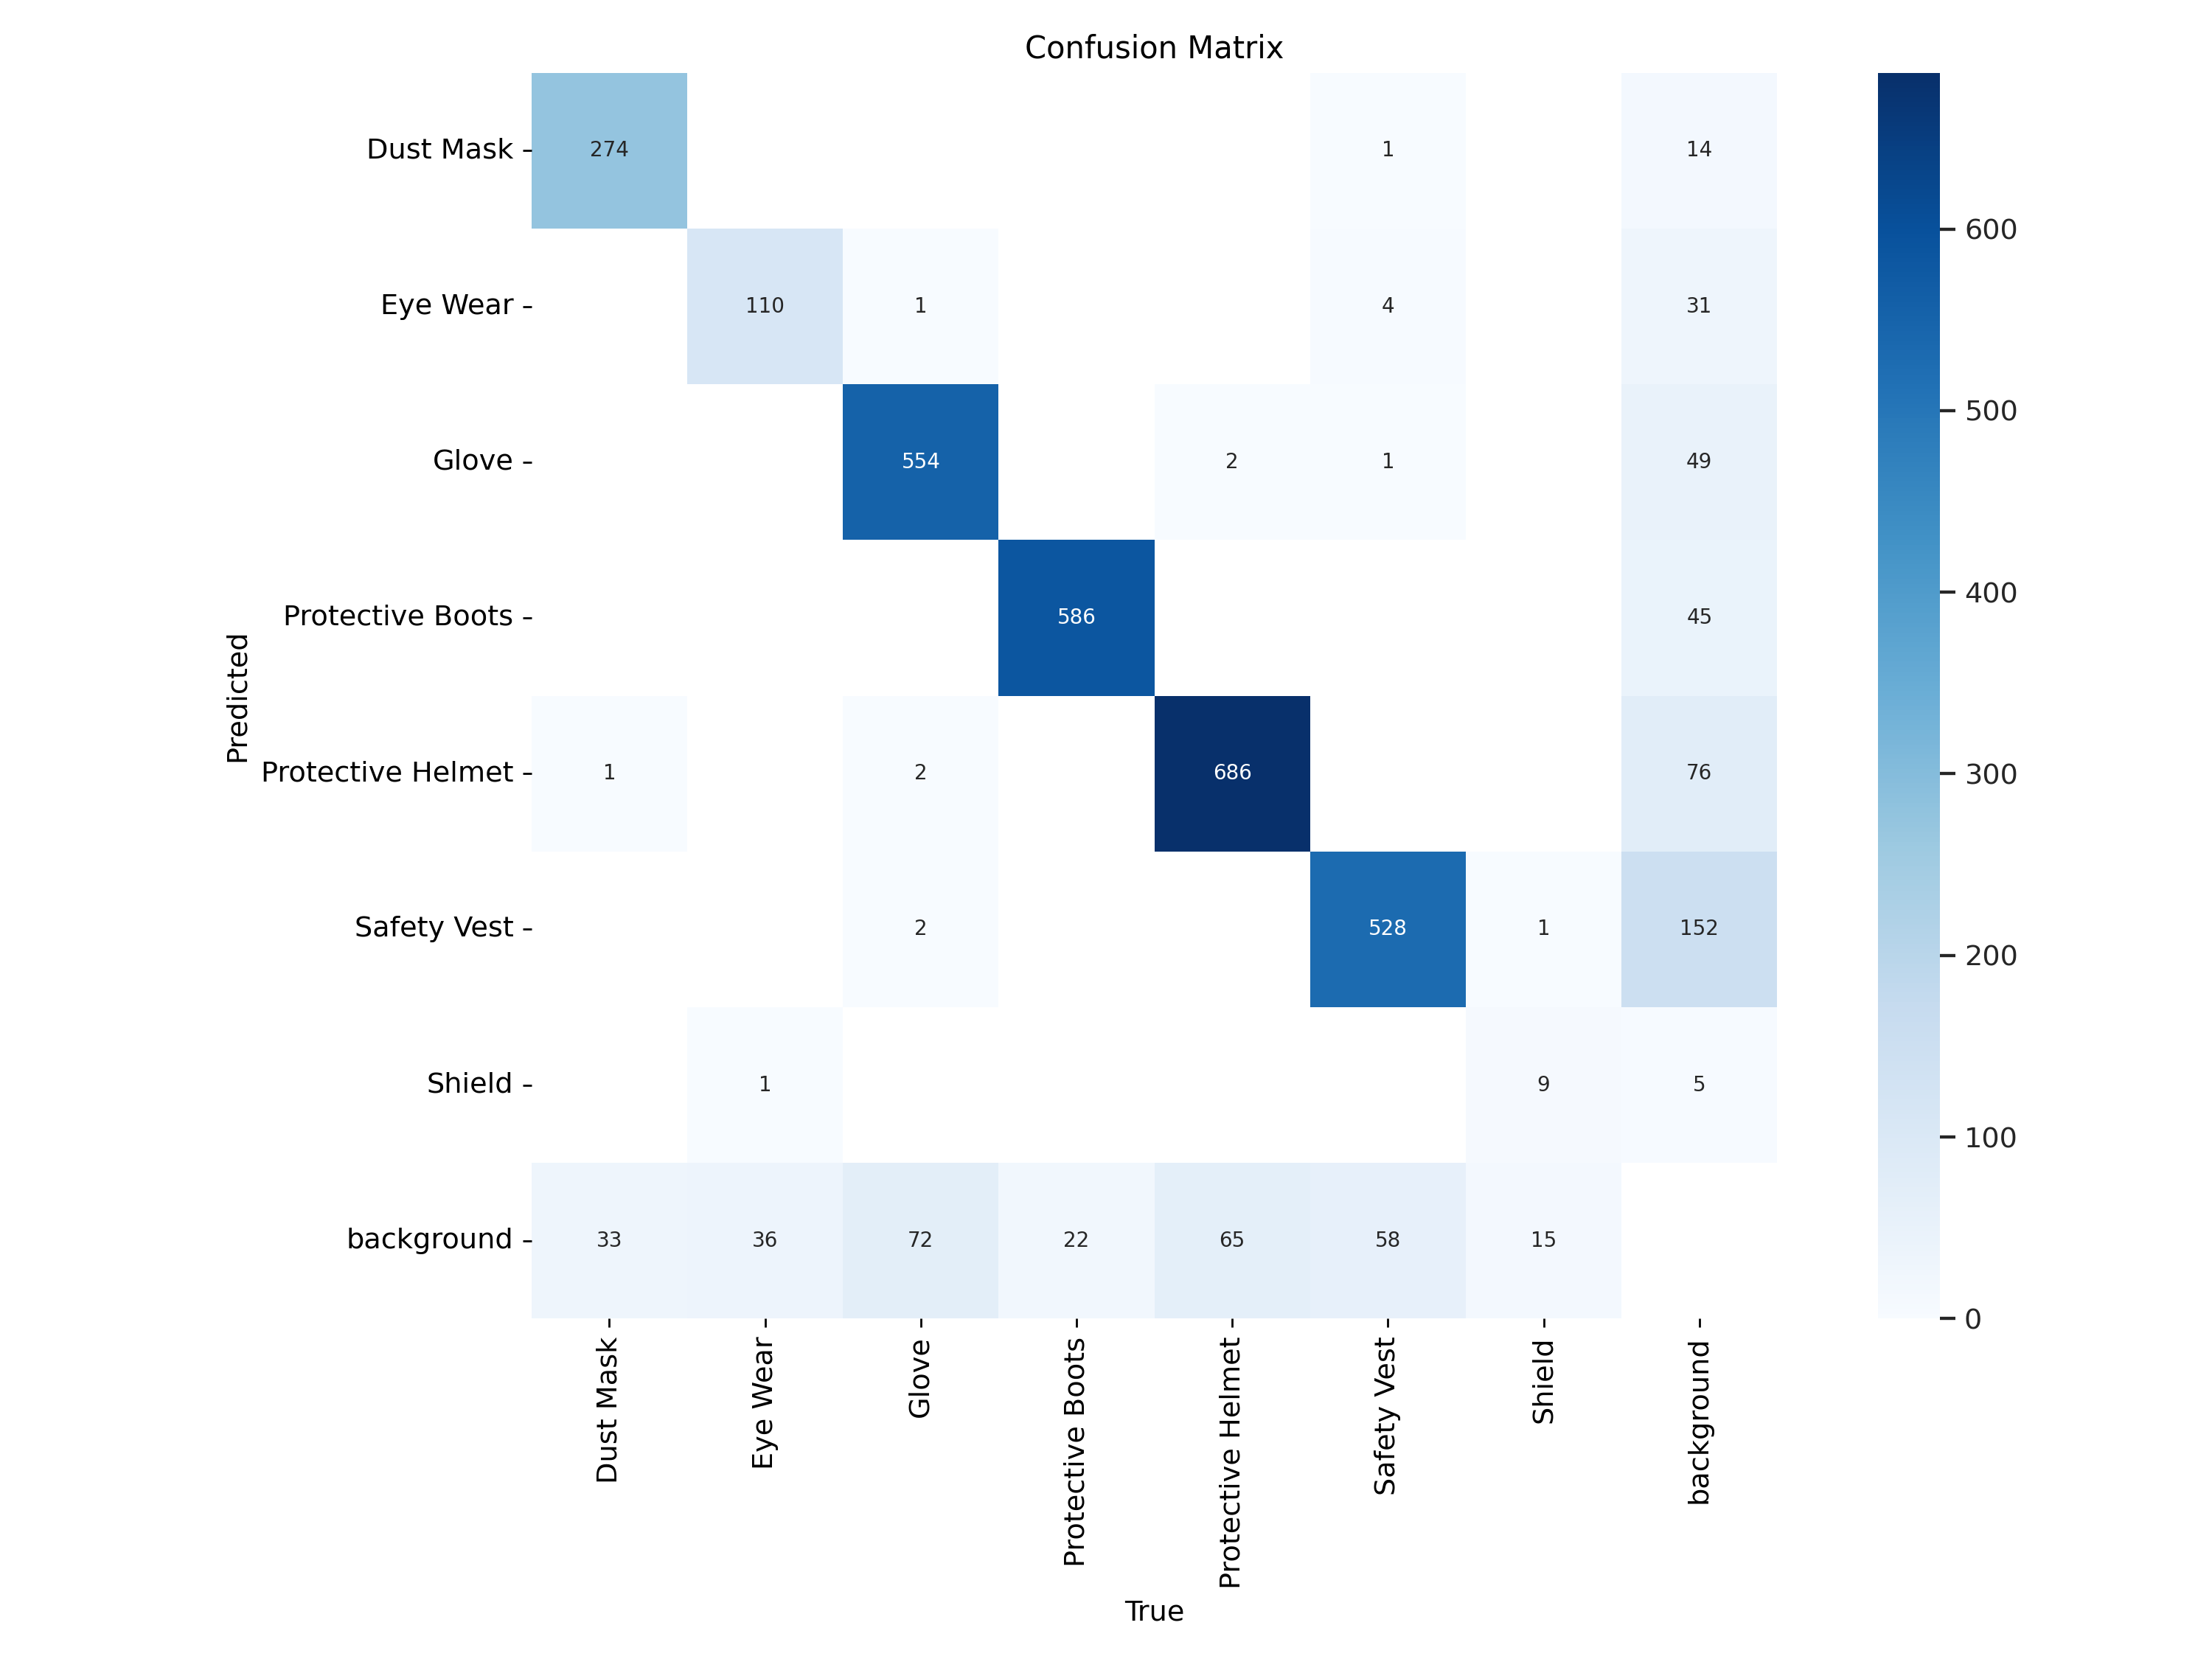

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=1000)

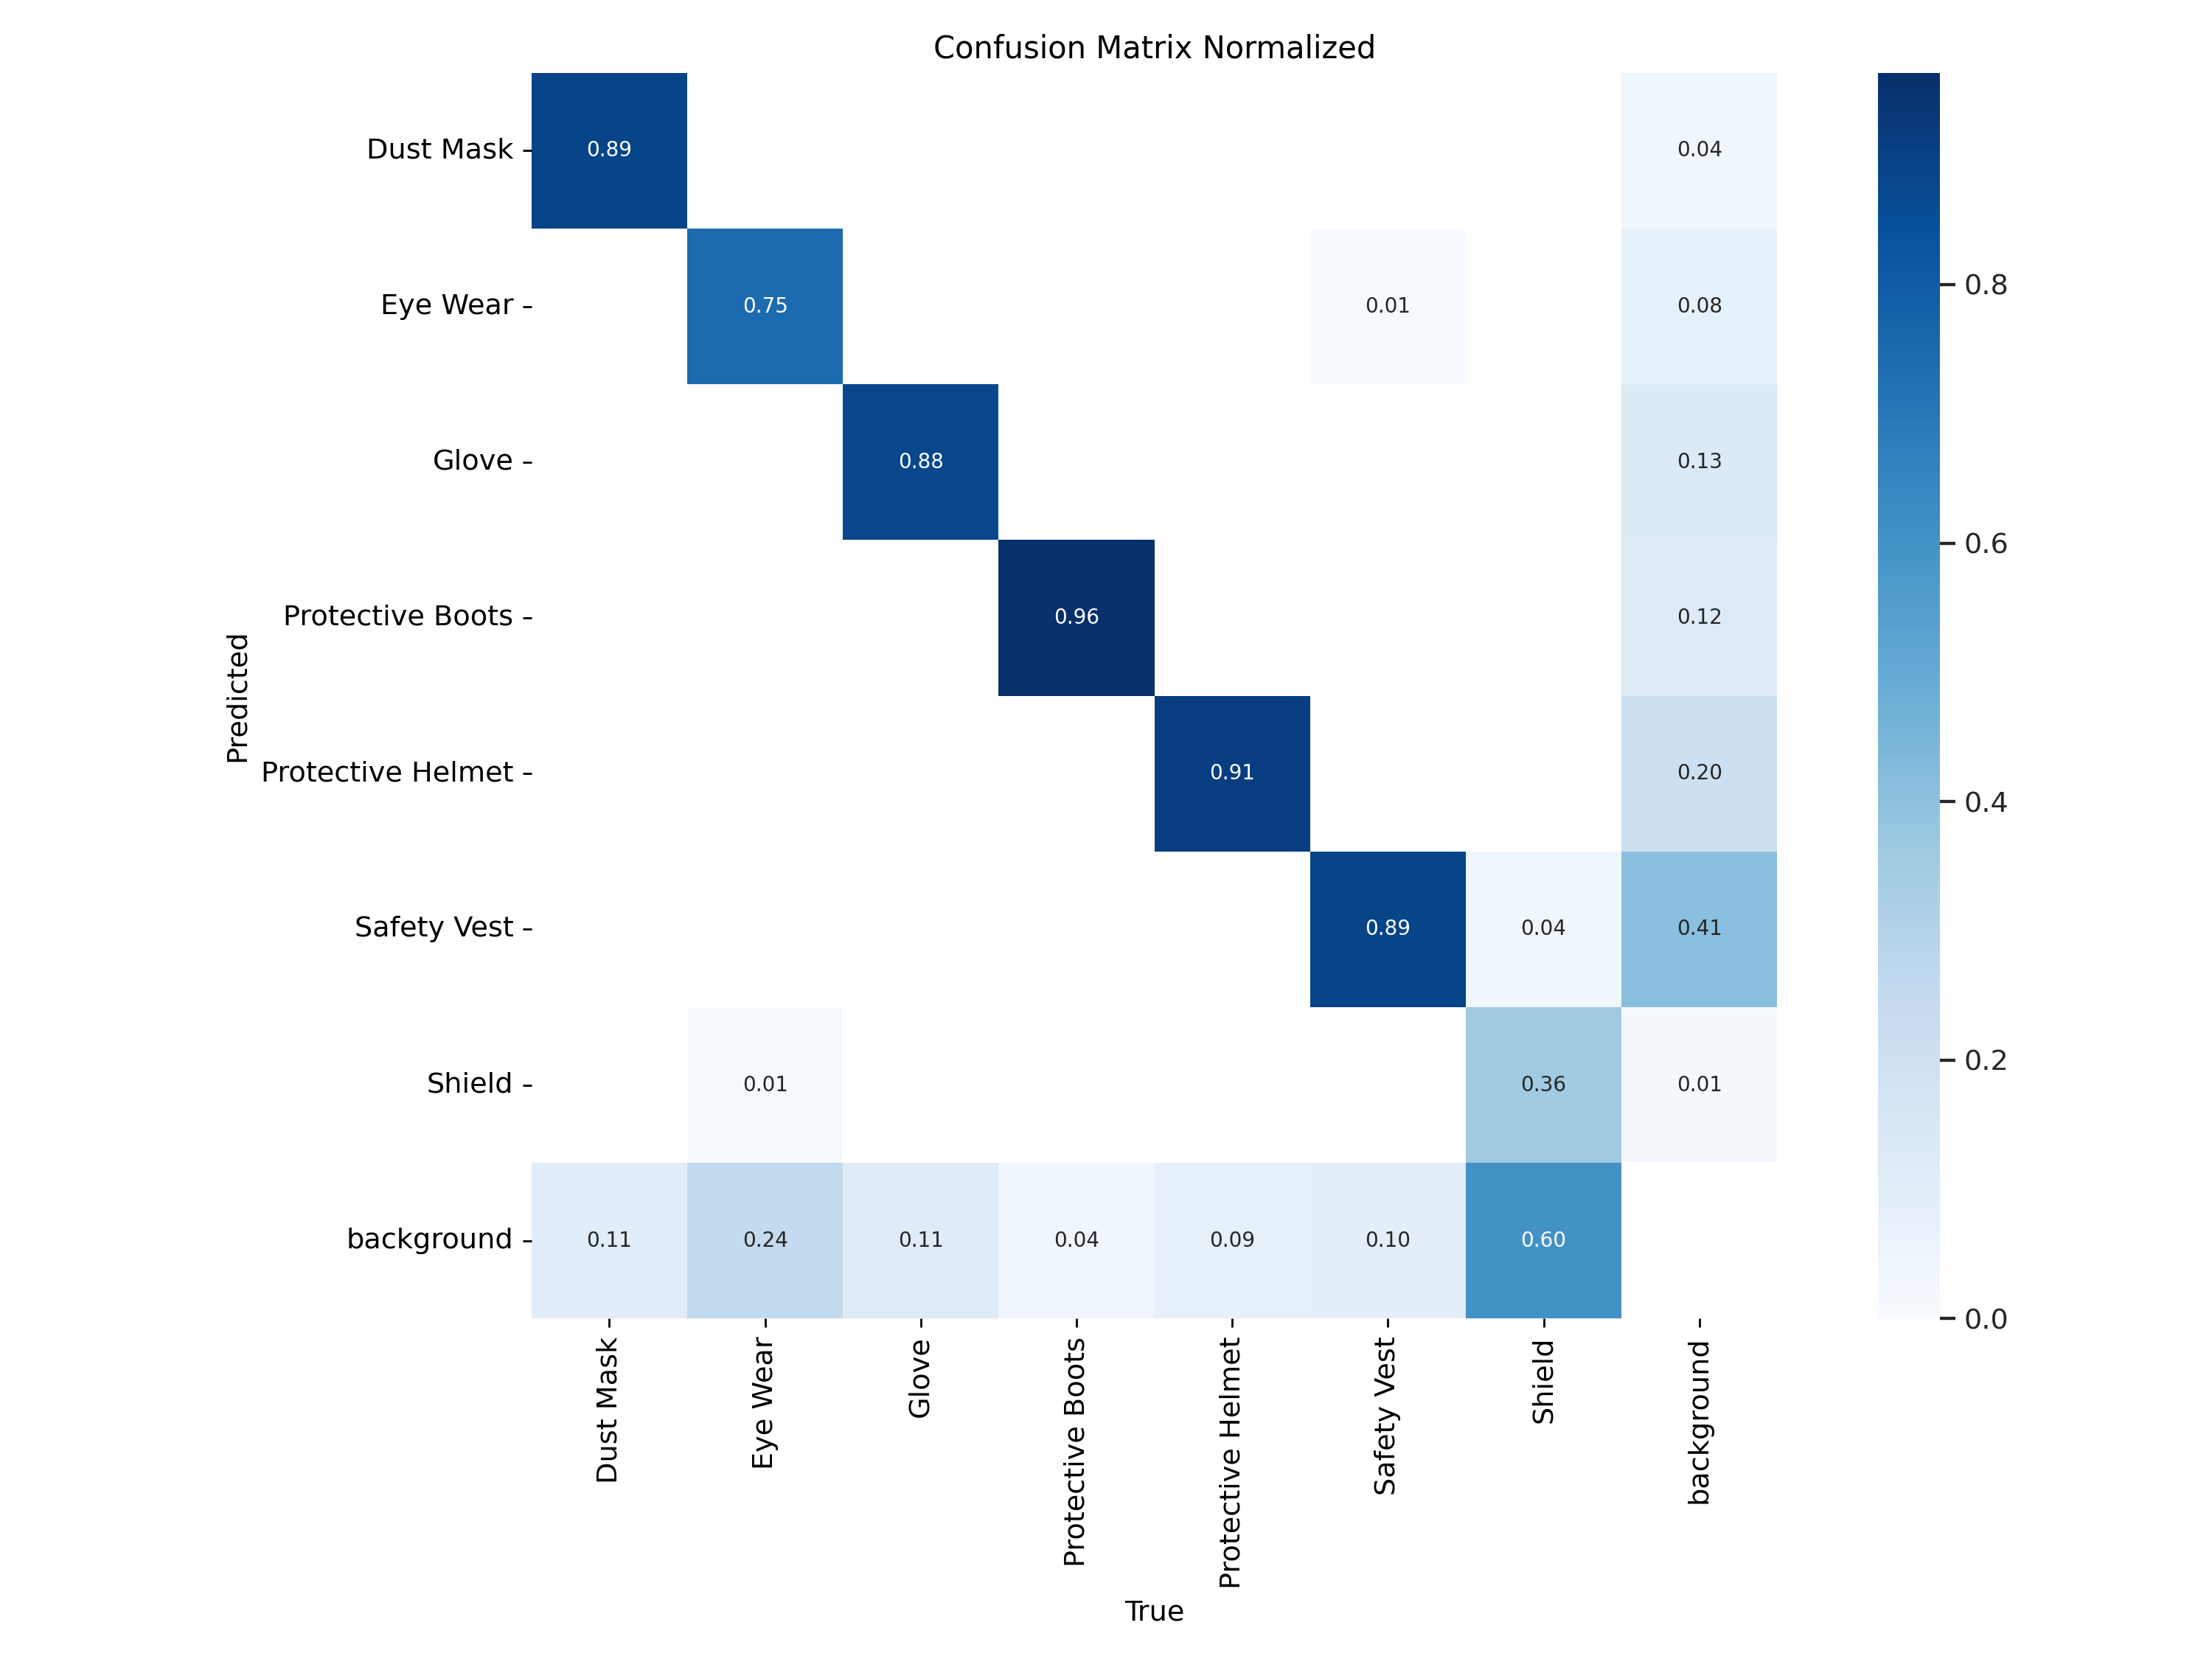

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix_normalized.png', width=1000)

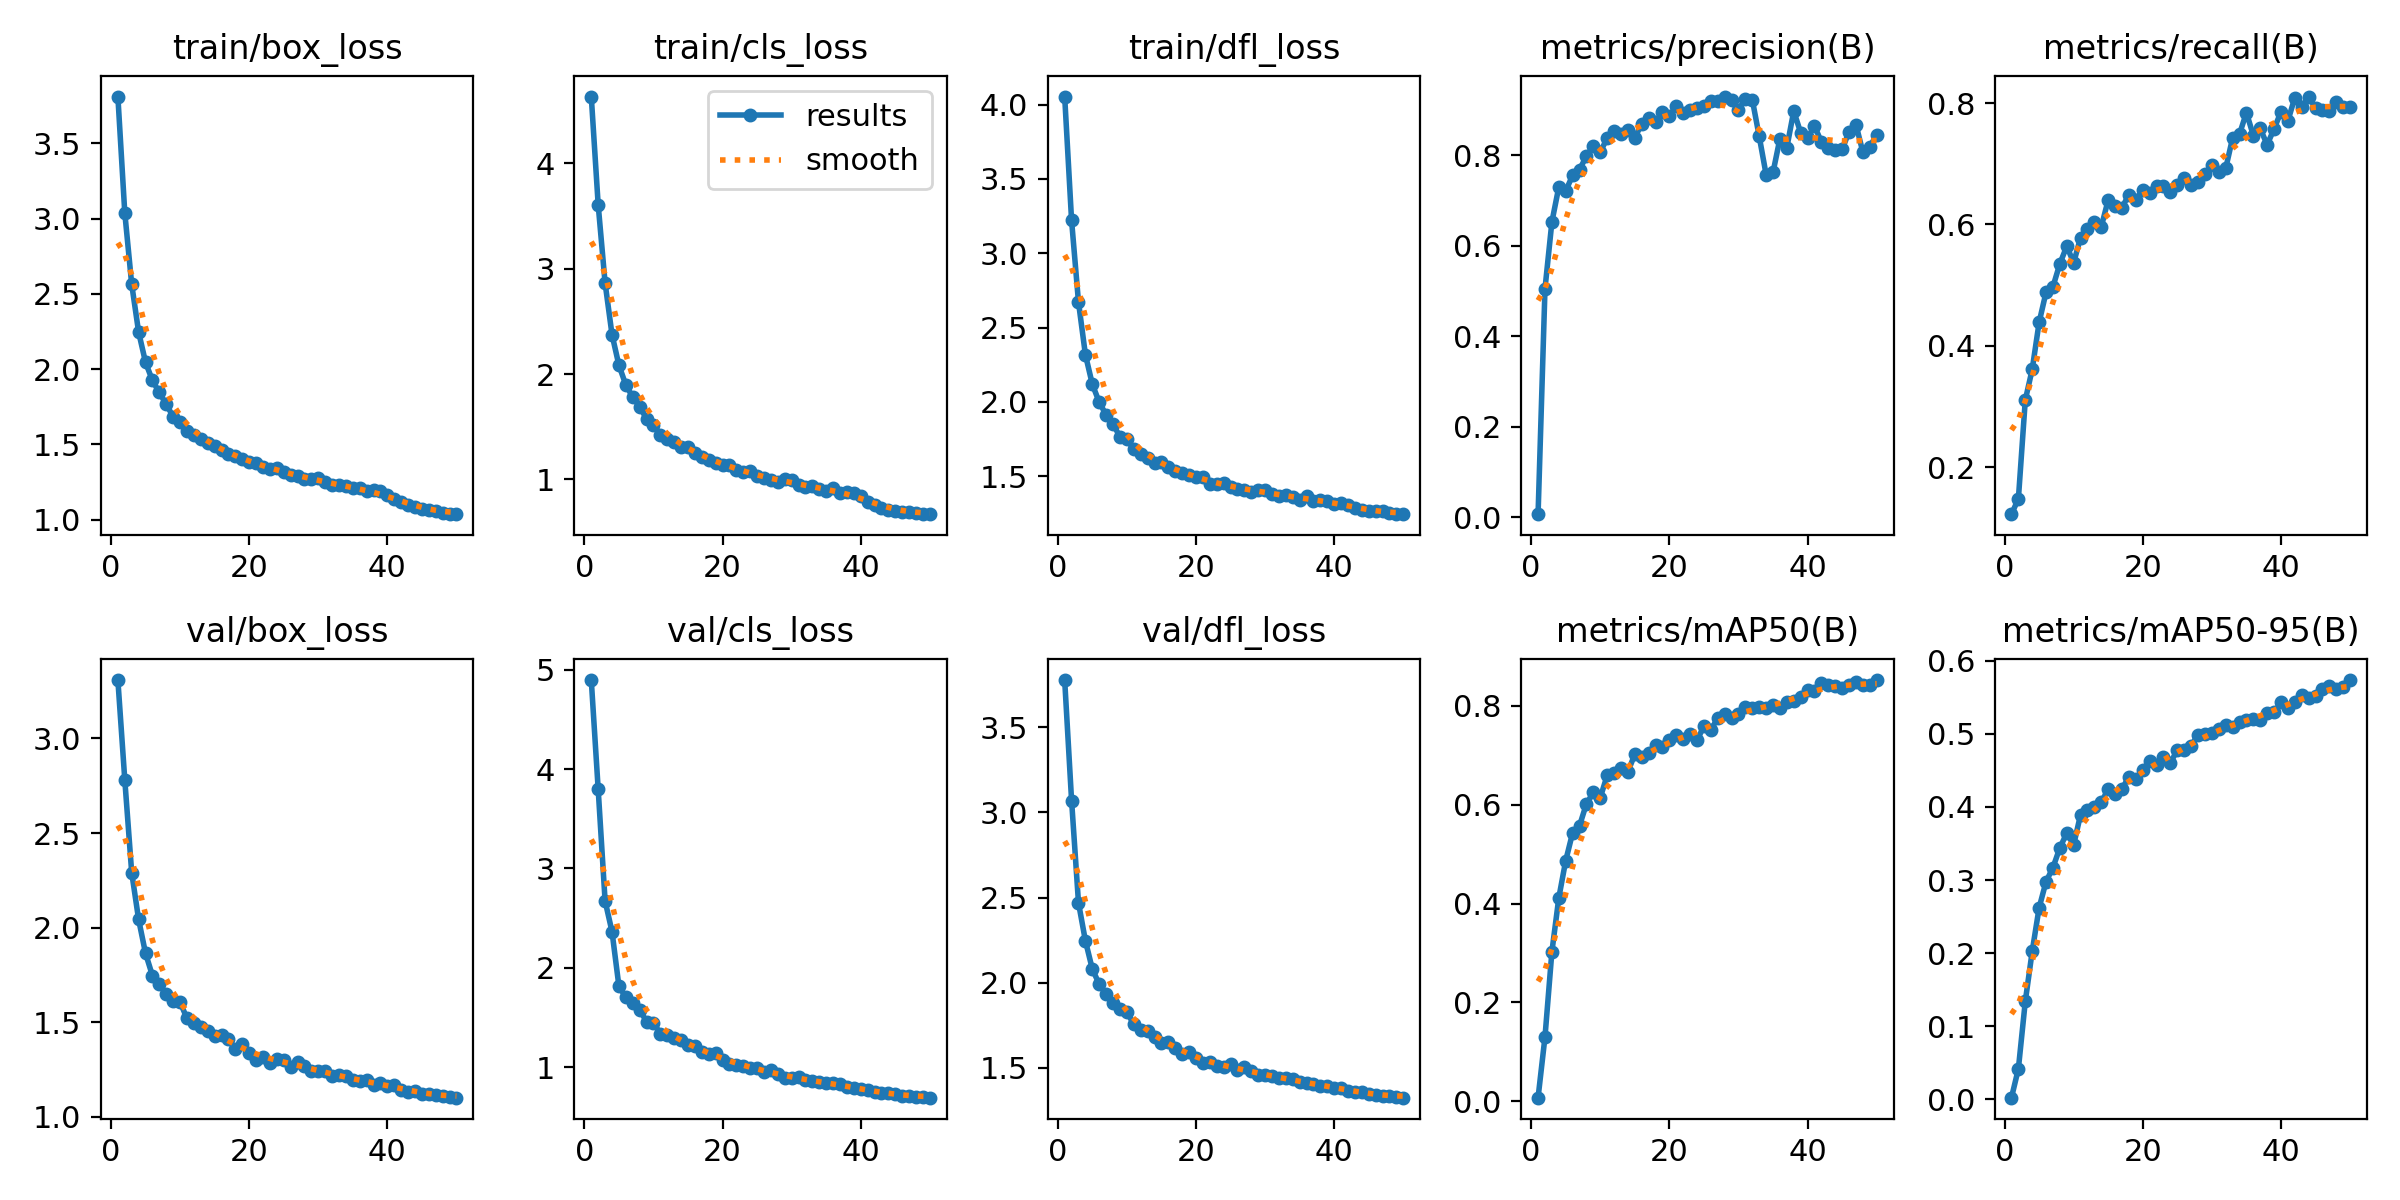

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=1000)

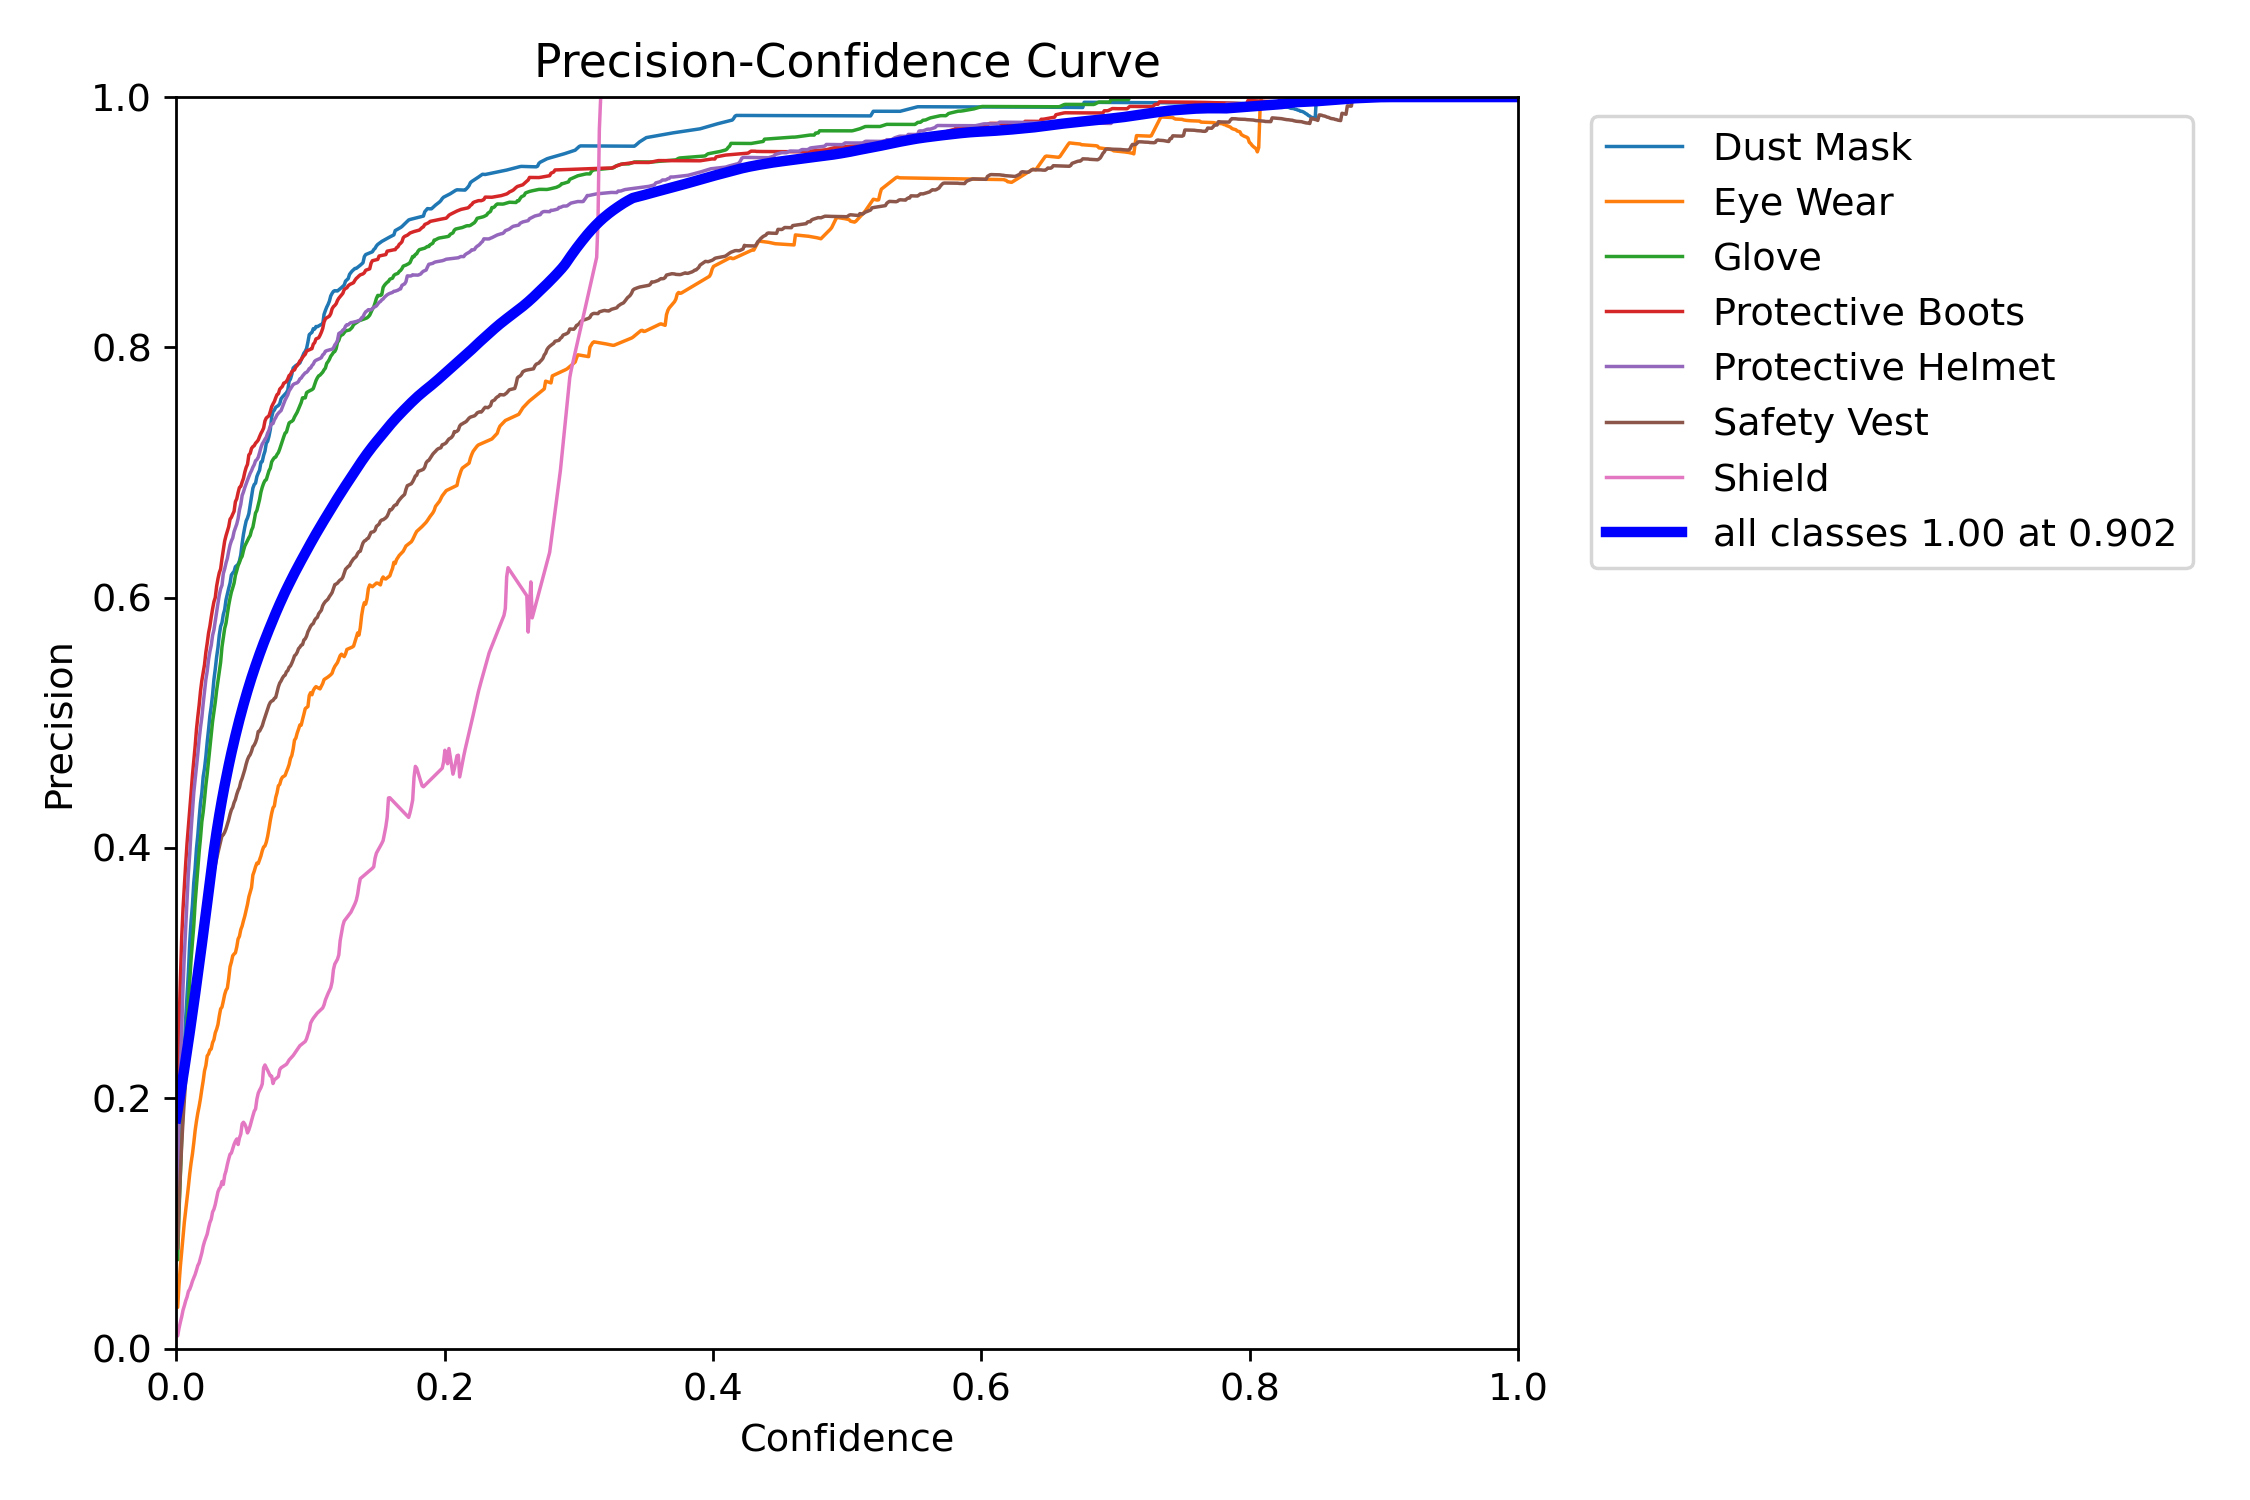

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/P_curve.png', width=1000)

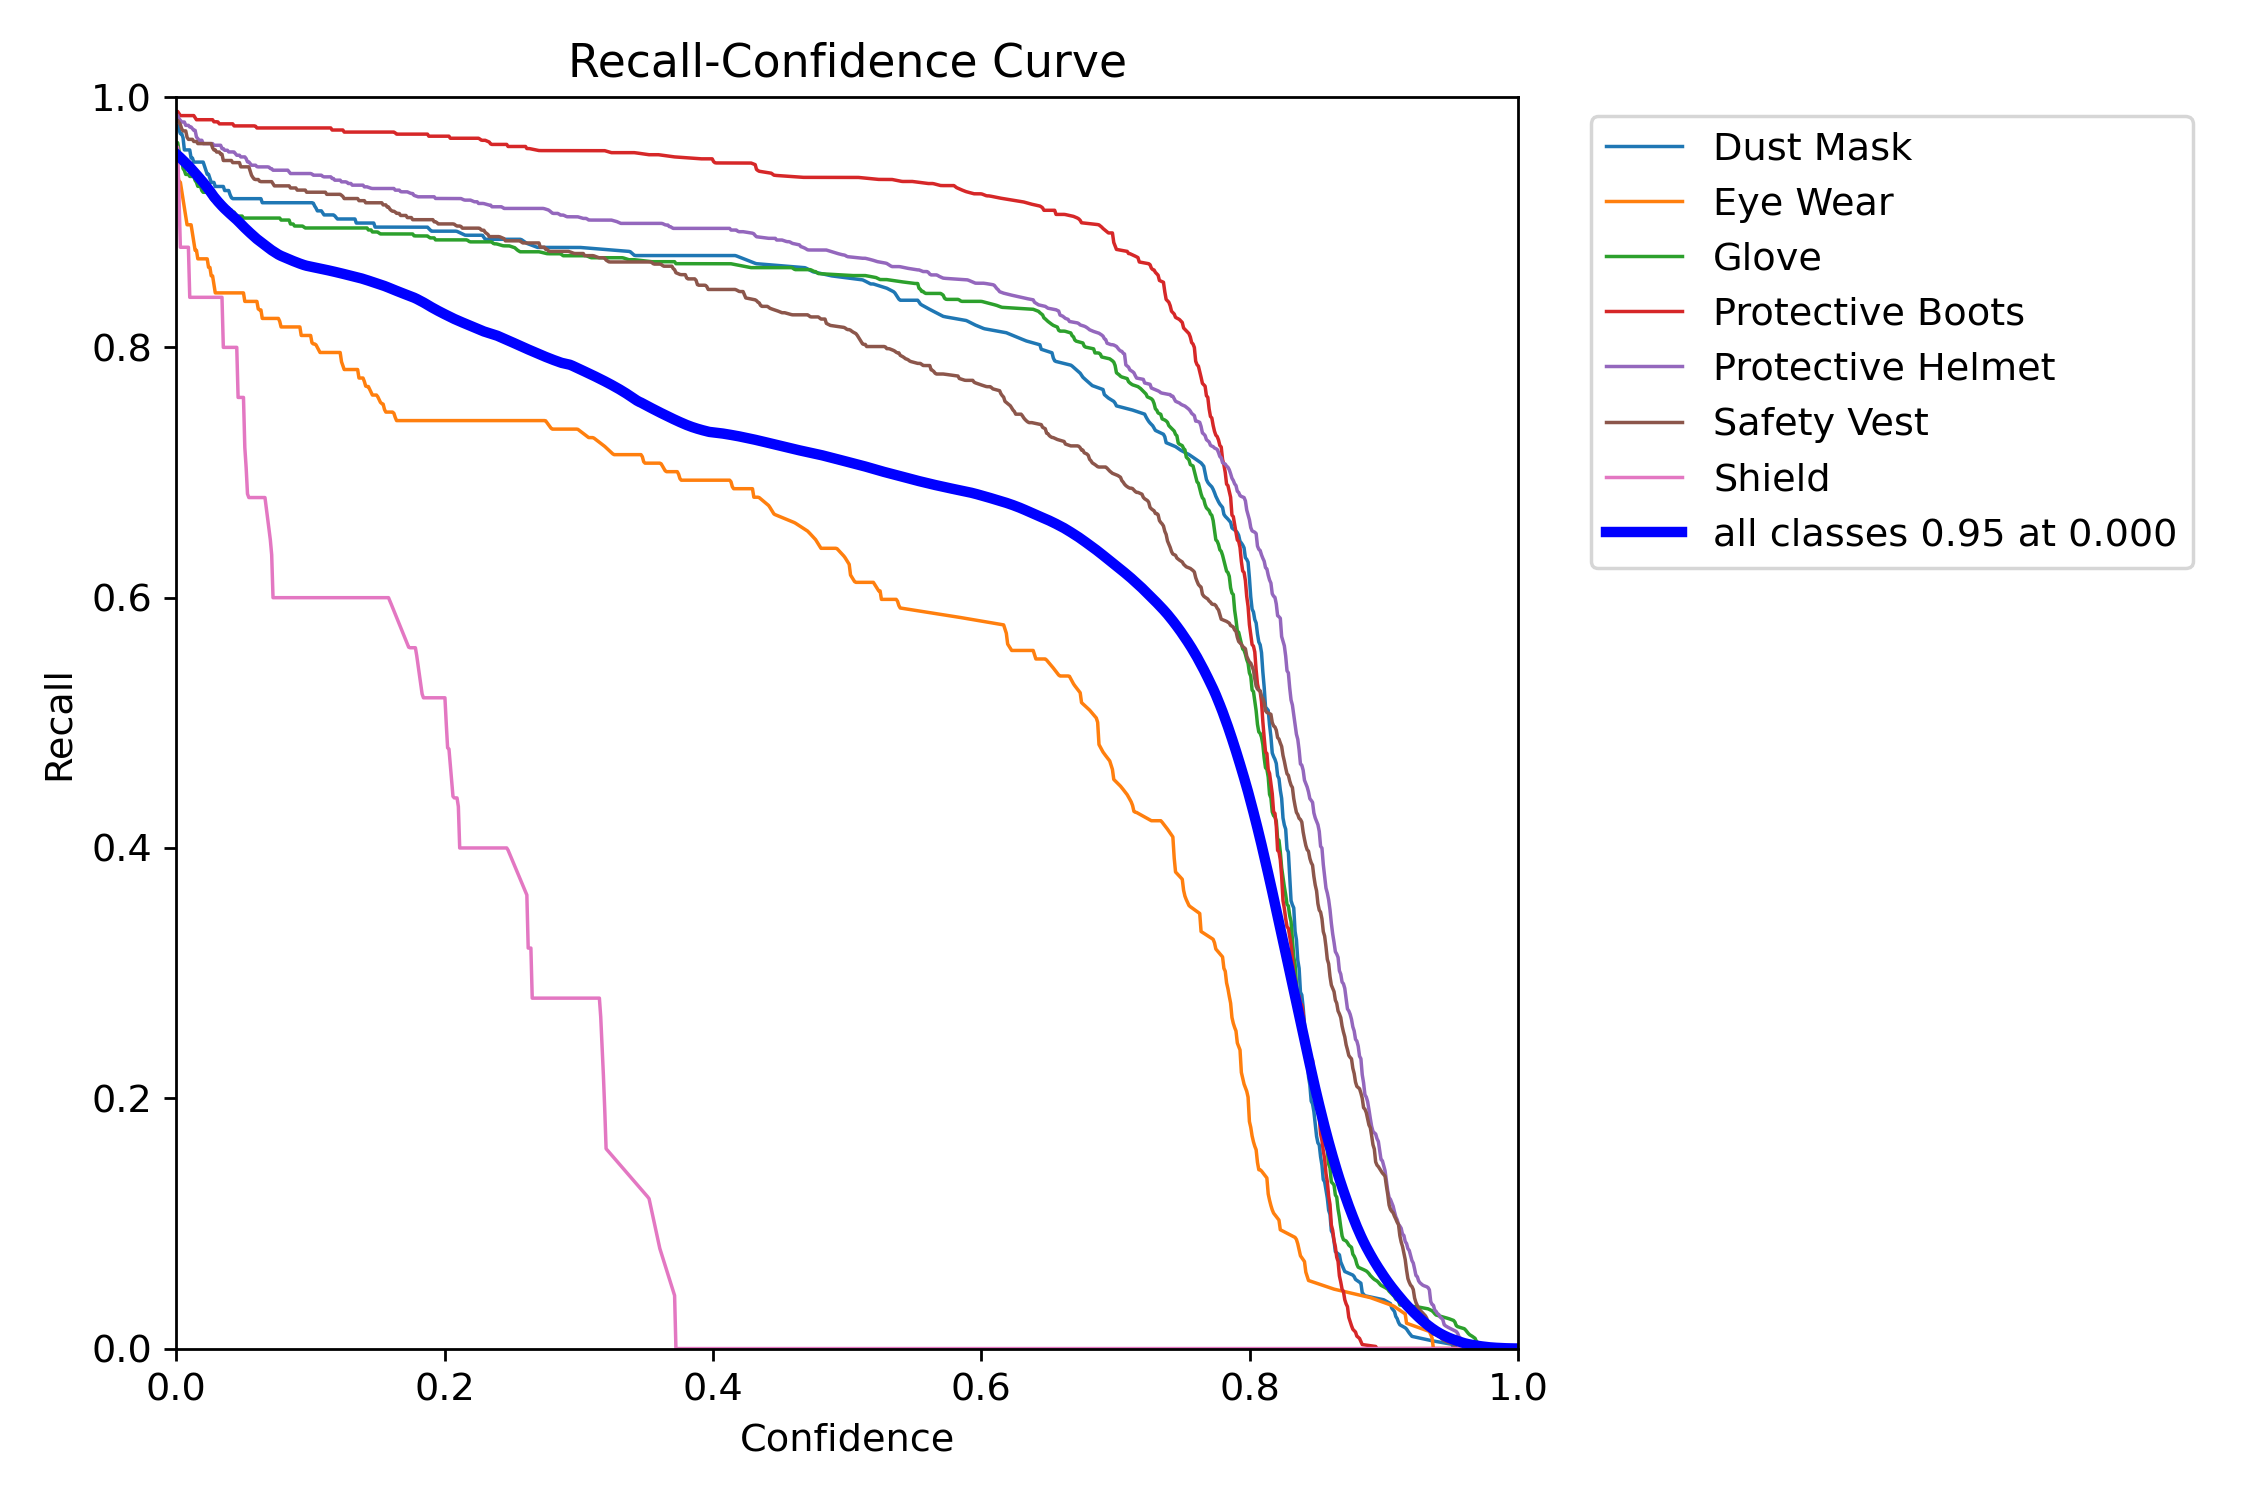

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/R_curve.png', width=1000)

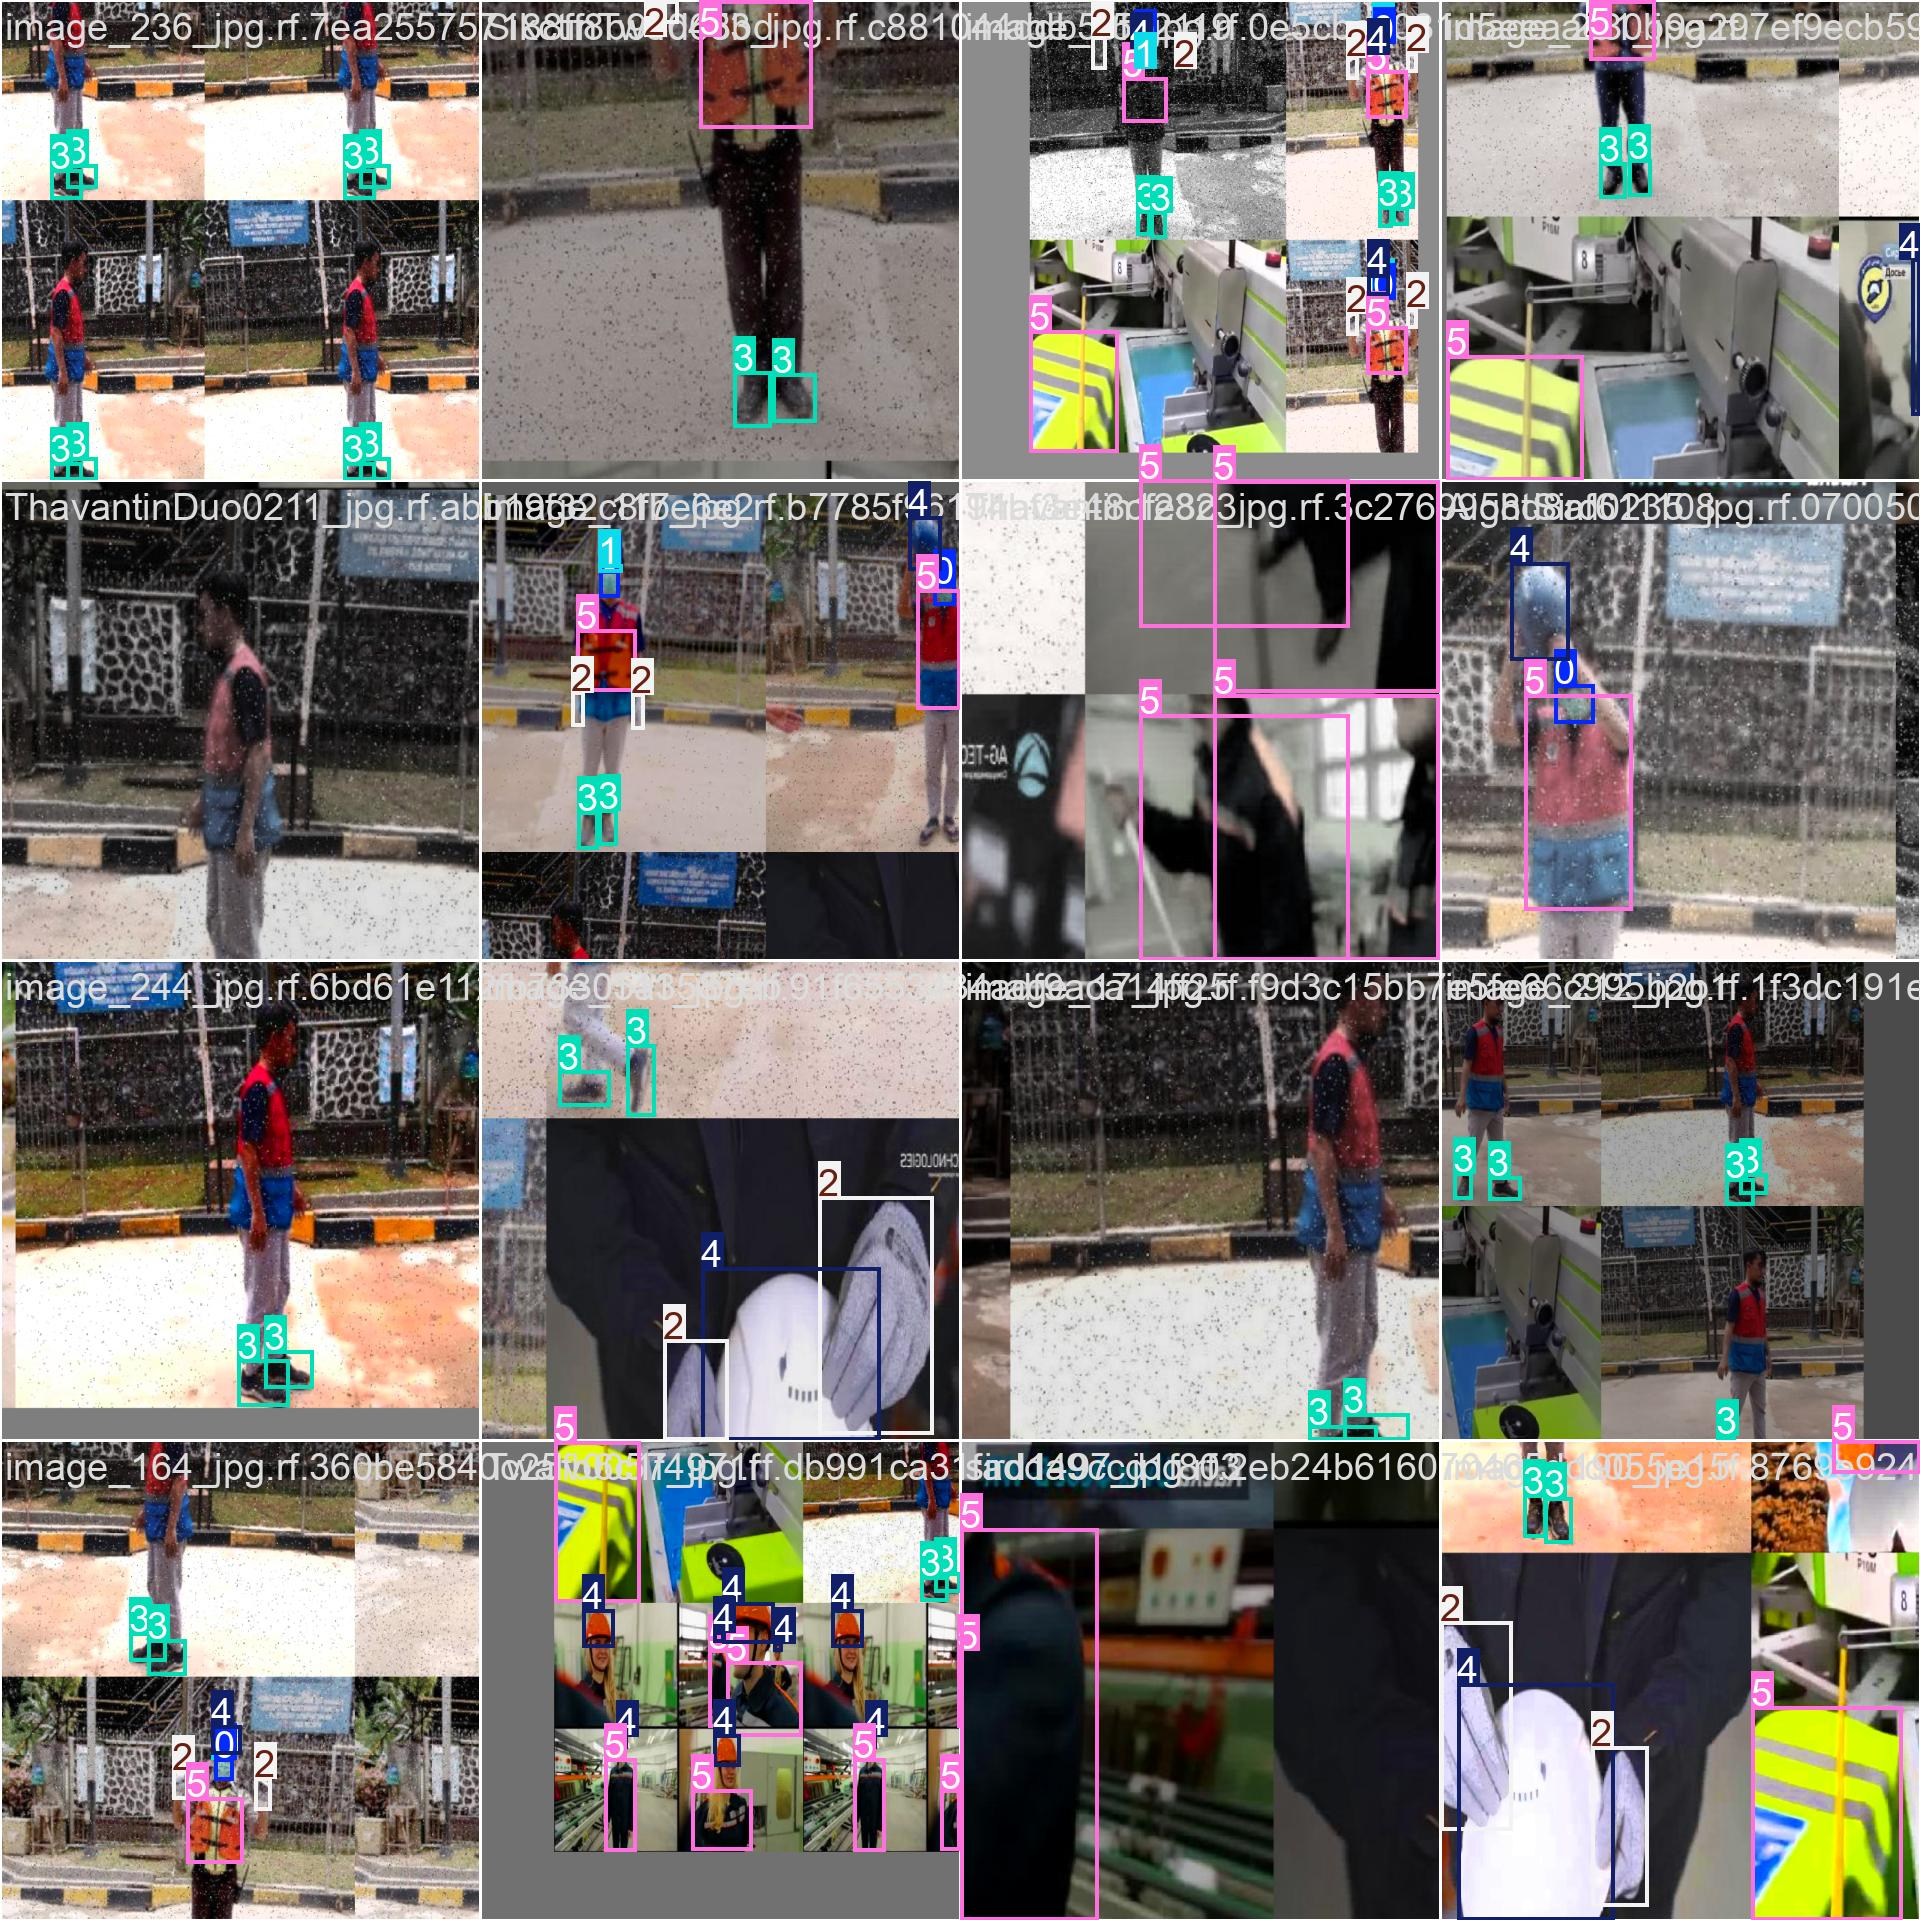

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/train_batch0.jpg', width=1000)

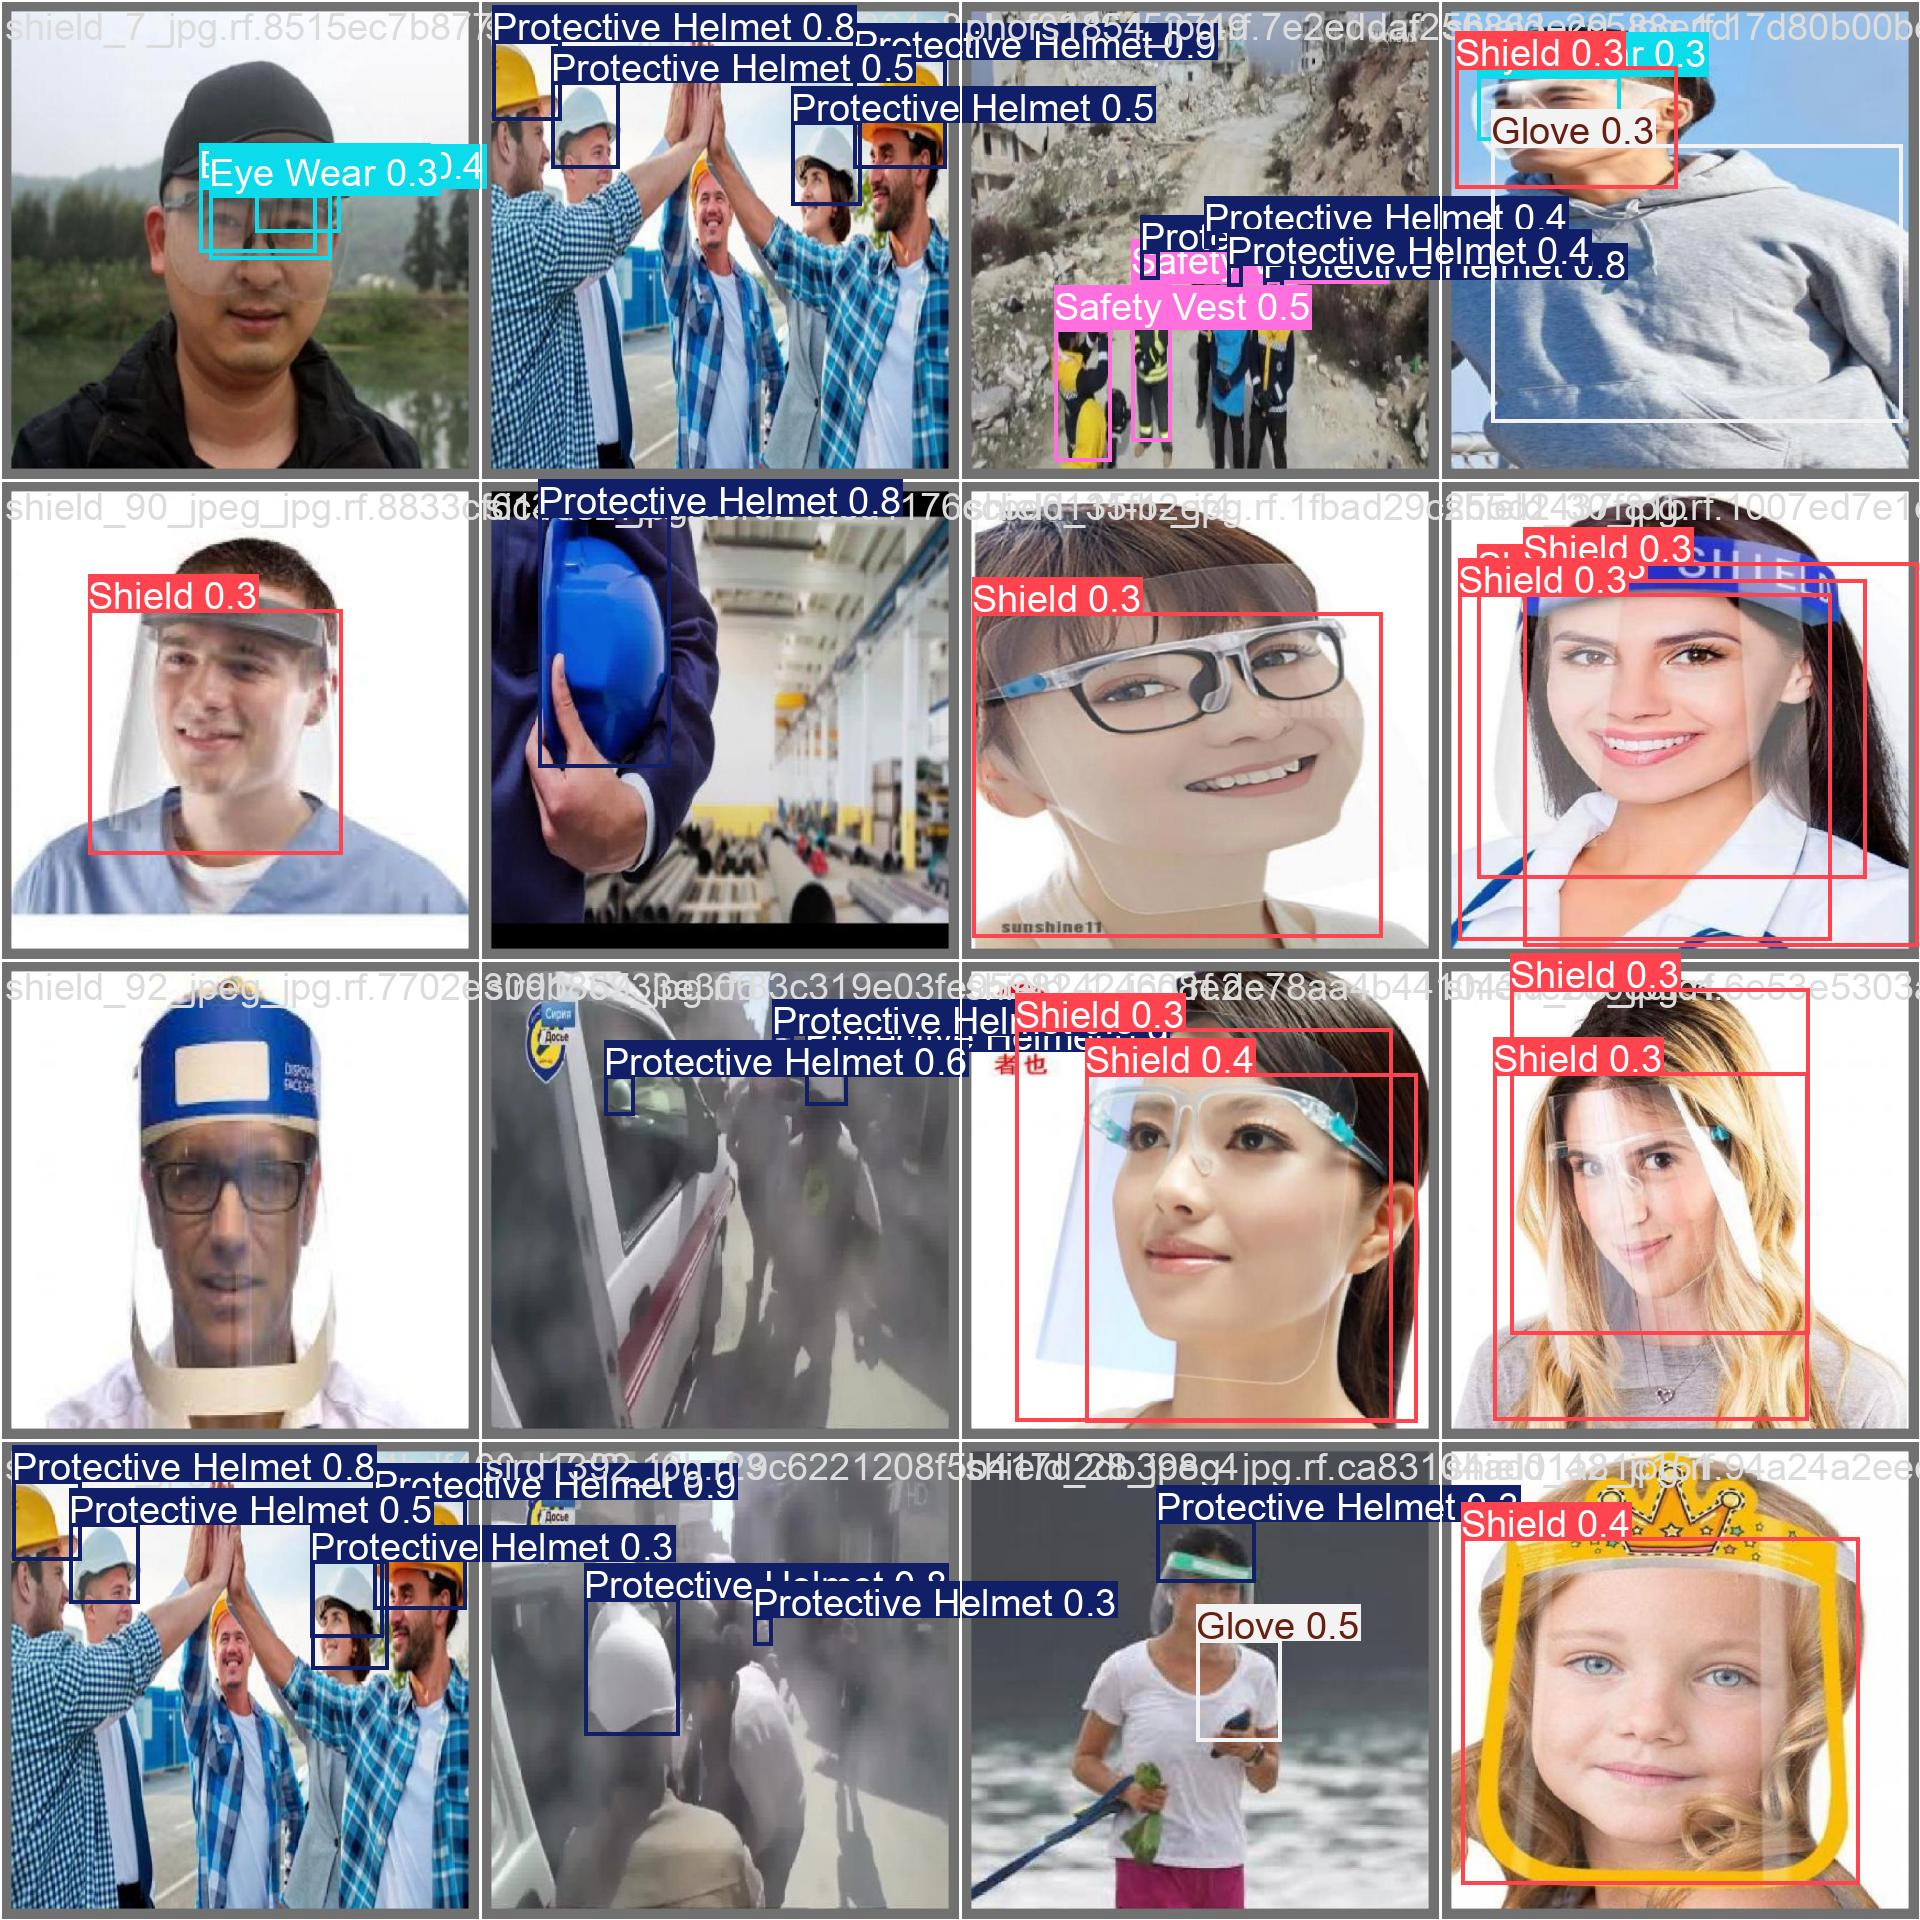

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp "/content/runs/detect/train2/weights/best.pt" "/content/drive/MyDrive/ppe_detect"

## **Step 06 Download the model weights from the google drive**

In [ ]:
!gdown "1iYVdEbMB0_izIQSmCF3XySgPQ1RpPmHg"

Downloading...
From (original): https://drive.google.com/uc?id=1iYVdEbMB0_izIQSmCF3XySgPQ1RpPmHg
From (redirected): https://drive.google.com/uc?id=1iYVdEbMB0_izIQSmCF3XySgPQ1RpPmHg&confirm=t&uuid=a1ebfa55-3c66-4bb1-a21e-f0edb3d73de0
To: /content/best.pt
100% 39.7M/39.7M [00:00<00:00, 95.0MB/s]


## **Step 07 Validate Fined-Tuned Model**

In [ ]:
model = YOLO("best.pt")

# Validate the model

metrics = model.val()
metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps

Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12m summary (fused): 402 layers, 19,581,925 parameters, 0 gradients, 59.5 GFLOPs


val: Scanning /content/PPE_Detection-2/valid/labels.cache... 637 images, 0 backgrounds, 0 corrupt: 100%|██████████| 637/637 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:26<00:00,  1.50it/s]


                   all        637       3064      0.845      0.794      0.852      0.574
             Dust Mask        299        308      0.946      0.883      0.933      0.649
              Eye Wear        146        147      0.762      0.741       0.78      0.434
                 Glove        346        631      0.924      0.876      0.919      0.637
      Protective Boots        298        608      0.936      0.957      0.976       0.68
     Protective Helmet        403        753      0.906      0.911      0.955      0.703
           Safety Vest        359        592      0.783      0.882      0.906      0.657
                Shield         25         25      0.658      0.308      0.494      0.255
Speed: 0.3ms preprocess, 33.6ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val


array([    0.64891,     0.43395,     0.63686,     0.68048,     0.70331,     0.65666,     0.25491])

## **Step 08 Inference with Custom Model on Images**

In [ ]:
dataset.location

'/content/PPE_Detection-2'

In [ ]:
results = model.predict(source = f"{dataset.location}/test/images", save = True)


image 1/322 /content/PPE_Detection-2/test/images/000446_jpg.rf.63a960737ed4b762294eea1ad1a92791.jpg: 640x640 2 Protective Helmets, 44.6ms
image 2/322 /content/PPE_Detection-2/test/images/20220721_161946_jpg.rf.905c375aa964159f9edab2a55a6e7476.jpg: 640x640 1 Glove, 44.6ms
image 3/322 /content/PPE_Detection-2/test/images/20220721_162015_jpg.rf.ccb5d8a5aed0bb50c04431fa0b0d5479.jpg: 640x640 1 Protective Helmet, 36.6ms
image 4/322 /content/PPE_Detection-2/test/images/20220721_162036_jpg.rf.2664c2f59604cd2380a51fd174055a7e.jpg: 640x640 (no detections), 34.7ms
image 5/322 /content/PPE_Detection-2/test/images/20220721_162308_jpg.rf.913971a6c64f38eabc6b69bab4409b46.jpg: 640x640 (no detections), 33.7ms
image 6/322 /content/PPE_Detection-2/test/images/20220721_162435_jpg.rf.d478427044384d4e32ba0c25b15b720d.jpg: 640x640 1 Safety Vest, 32.9ms
image 7/322 /content/PPE_Detection-2/test/images/20220721_162444_jpg.rf.107652f17f526c25f74bb7b181c46717.jpg: 640x640 1 Protective Helmet, 31.3ms
image 8/322

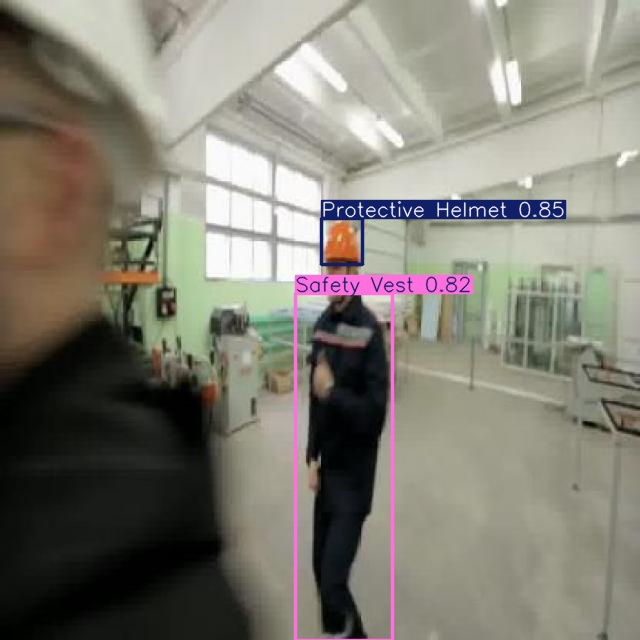

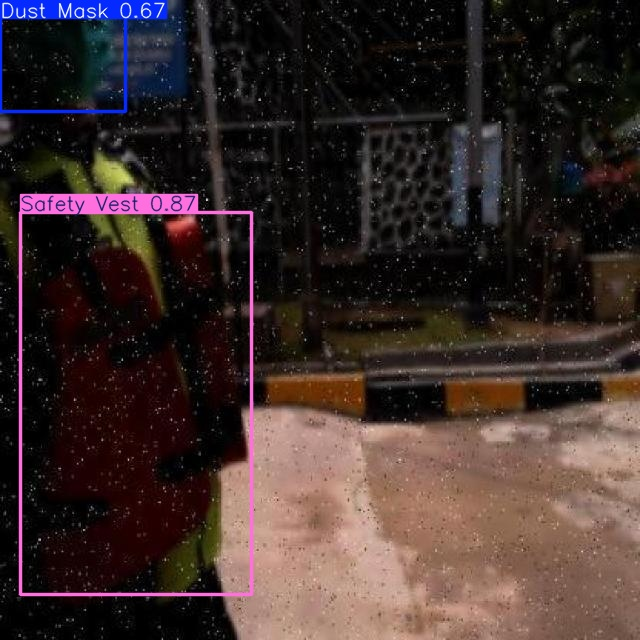

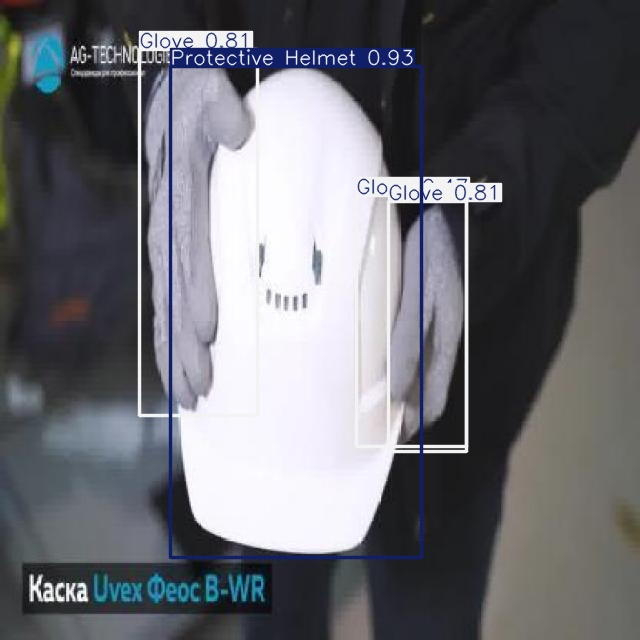

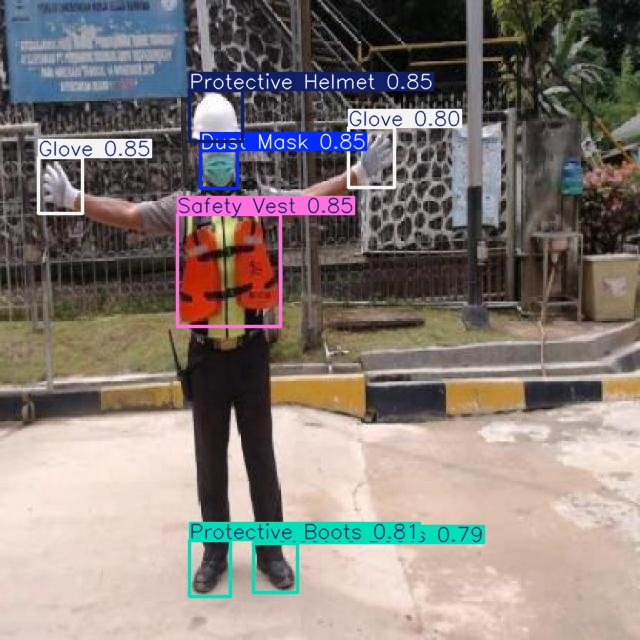

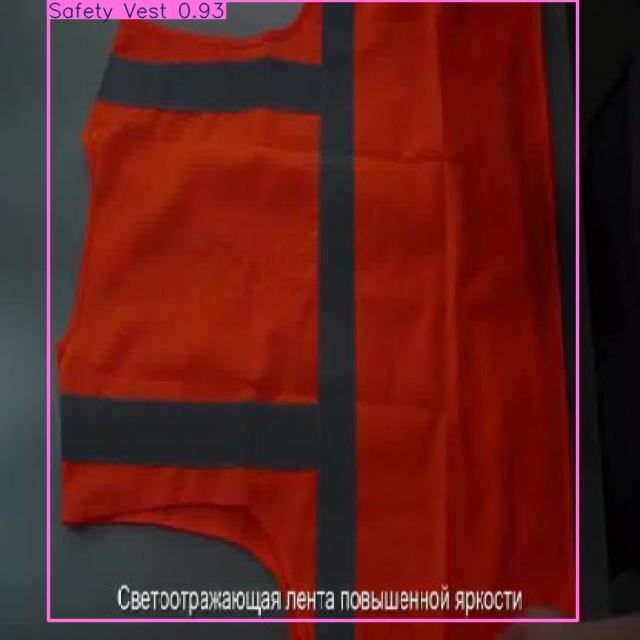

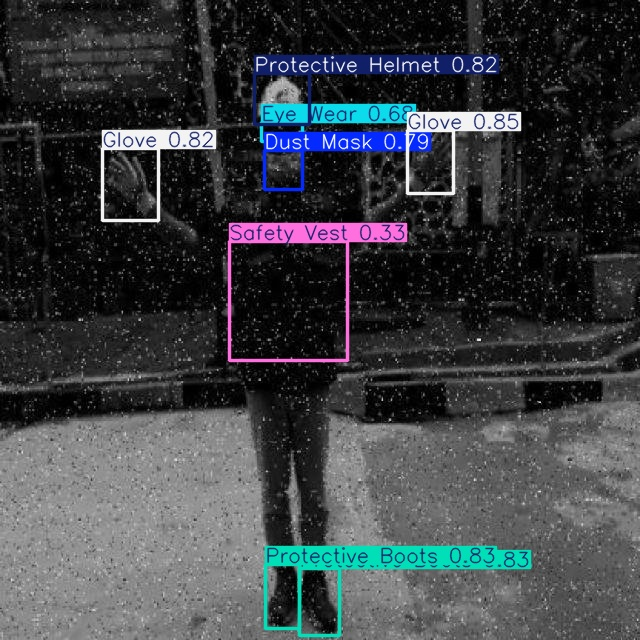

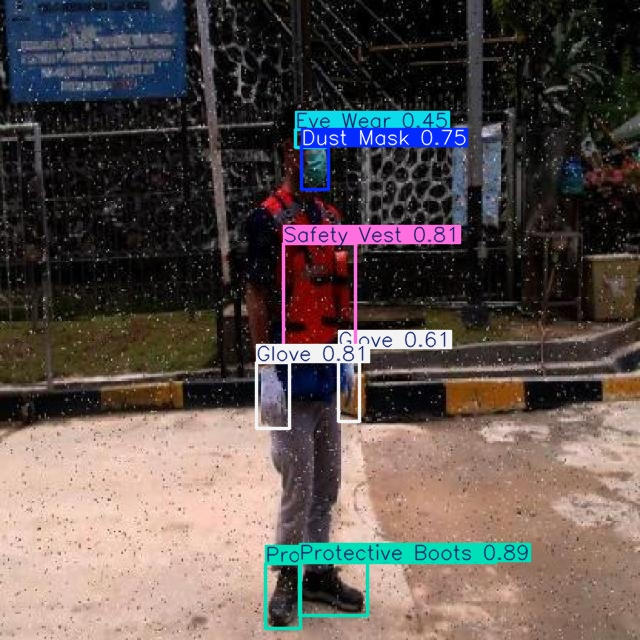

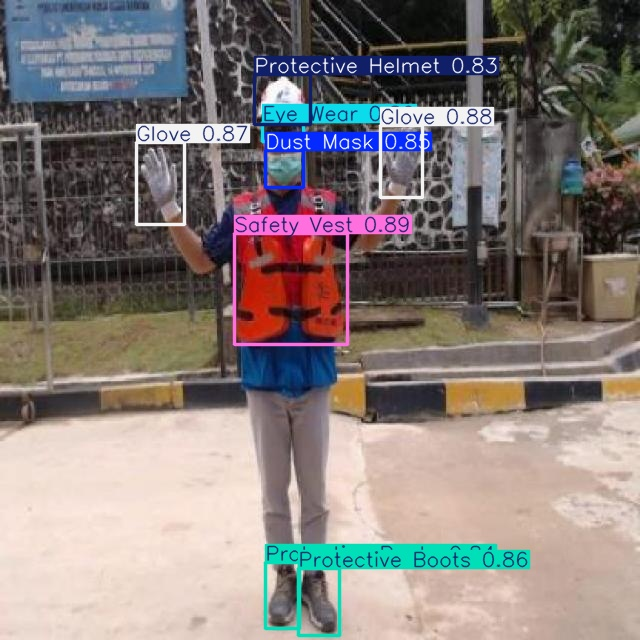

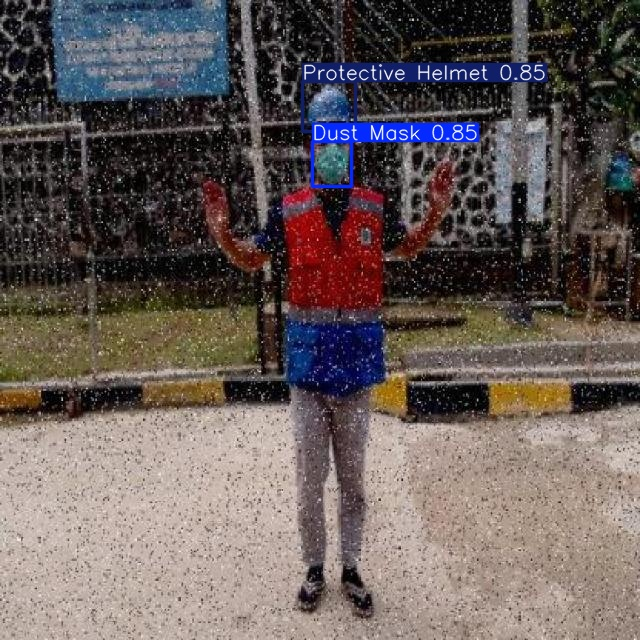

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:10]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## **Step 09 inference with Custom Model on Videos**

In [ ]:
!gdown "1iYVdEbMB0_izIQSmCF3XySgPQ1RpPmHg"

Downloading...
From (original): https://drive.google.com/uc?id=1iYVdEbMB0_izIQSmCF3XySgPQ1RpPmHg
From (redirected): https://drive.google.com/uc?id=1iYVdEbMB0_izIQSmCF3XySgPQ1RpPmHg&confirm=t&uuid=552a0d74-fe4e-4330-85a4-c8158204728e
To: /content/best.pt
100% 39.7M/39.7M [00:00<00:00, 94.8MB/s]


In [ ]:
!gdown "1z-5Aw84HQr_LT_1xUEruAtHGvcw_Jrec"

Downloading...
From: https://drive.google.com/uc?id=1z-5Aw84HQr_LT_1xUEruAtHGvcw_Jrec
To: /content/PPE_Part1.mp4
100% 14.2M/14.2M [00:00<00:00, 35.4MB/s]


In [ ]:
!gdown "1Cbhi4zdUxfhnTi_kuY-Bk4r1e45ehUlx"

Downloading...
From: https://drive.google.com/uc?id=1Cbhi4zdUxfhnTi_kuY-Bk4r1e45ehUlx
To: /content/PPE_Part2.mp4
100% 11.1M/11.1M [00:00<00:00, 52.6MB/s]


In [ ]:
results = model.predict(source = f"/{HOME}/PPE_Part1.mp4", save = True, iou=0.1)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/310) //content/PPE_Part1.mp4: 384x640 2 Safety Vests, 56.0ms
video 1/1 (frame 2/310) //content/PPE_Part1.mp4: 384x640 2 Safety Vests, 26.8ms
video 1/1 (frame 3/310) //content/PPE_Part1.mp4: 384x640 2 Safety Vests, 28.4ms
video 1/1 (frame 4/310) //content/PPE_Part1.mp4: 384x640 2 Safety Vests, 26.8ms
video 1/1 (frame 5/310) //content/PPE_Part1.mp4: 384x640 1 Protective Helmet, 3 Safety Vests, 29.5ms
video 1/1 (frame 6/310) //content/P

In [ ]:
results = model.predict(source = f"/{HOME}/PPE_Part2.mp4", save = True, iou=0.1)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/267) //content/PPE_Part2.mp4: 384x640 (no detections), 26.8ms
video 1/1 (frame 2/267) //content/PPE_Part2.mp4: 384x640 1 Safety Vest, 26.8ms
video 1/1 (frame 3/267) //content/PPE_Part2.mp4: 384x640 1 Safety Vest, 27.8ms
video 1/1 (frame 4/267) //content/PPE_Part2.mp4: 384x640 (no detections), 26.8ms
video 1/1 (frame 5/267) //content/PPE_Part2.mp4: 384x640 (no detections), 26.8ms
video 1/1 (frame 6/267) //content/PPE_Part2.mp4: 384x64